# Volume 4: Numerical Methods for IVPs
    <Name>
    <Class>
    <Date>

In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [130]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    # Calculate h
    h = (t[-1] - t[0])/(len(t) -1)
    
    # Initialze approximate solution array
    answers_1 = np.ones(len(t))
    answers_1[0] = x0
    
    # Run Euler method
    for i in range(1, len(t)):
        answers_1[i] = answers_1[i-1] + h * f(t[i-1], answers_1[i-1])
        
    # Return answers
    return answers_1
    

    
    

In [131]:
# Right side of differential equation
function = lambda t,x: x - 2*t + 4

true_result = -2 + 2*2 + 2*np.exp(2)
Euler_Errors = []

# h = 0.2
euler_t_1 = np.arange(0,2.1,0.2)
euler_answer_1 = euler(function, 0, euler_t_1 )
Euler_Errors.append(np.abs(true_result - euler_answer_1[-1])/np.abs(true_result))

# h = 0.1
t_2 = np.arange(0, 2.1, 0.1)
answer_2 = euler(function, 0, t_2)
Euler_Errors.append(np.abs(true_result - answer_2[-1])/np.abs(true_result))

# h = 0.05
t_3 = np.arange(0, 2.04, 0.05)
answer_3 = euler(function, 0, t_3)
Euler_Errors.append(np.abs(true_result - answer_3[-1])/np.abs(true_result))

# h = 0.025
t_4 = np.arange(0,2.001, 0.025)
answer_4 = euler(function, 0, t_4)
Euler_Errors.append(np.abs(true_result - answer_4[-1])/np.abs(true_result))

# h = 0.0125
t_5 = np.arange(0, 2.00001, 0.0125)
answer_5 = euler(function, 0, t_5)
Euler_Errors.append(np.abs(true_result - answer_5[-1])/np.abs(true_result))

Euler_Errors.reverse()

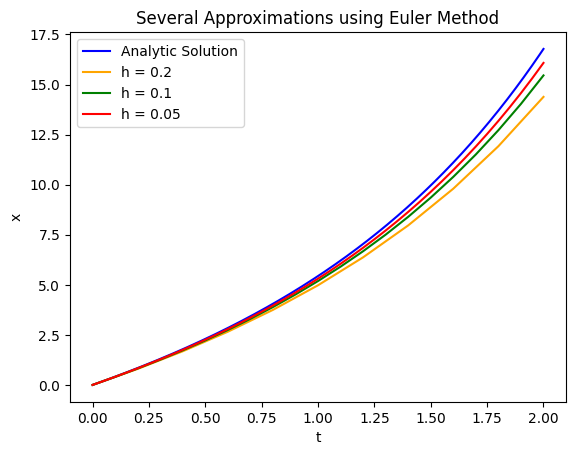

In [132]:
# Make a lambda function for the analytic solution
analytic = lambda t: -2 + 2*t + 2*np.exp(t)
T = np.linspace(0,2,500)

# Plot data
plt.plot(T, analytic(T), color = 'blue', label = 'Analytic Solution')
plt.plot(euler_t_1, euler_answer_1, color = 'orange', label = 'h = 0.2')
plt.plot(t_2, answer_2, color = 'green', label = 'h = 0.1' )
plt.plot(t_3, answer_3, color = 'red', label = 'h = 0.05' )
plt.xlabel('t')
plt.ylabel('x')
plt.title('Several Approximations using Euler Method')
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [133]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
     # Calculate h
    h = (t[-1] - t[0])/(len(t) -1)
    
    # Initialze approximate solution array
    answers_1 = np.ones(len(t))
    answers_1[0] = x0
    
    # Run Midpoint method
    for i in range(1, len(t)):
        answers_1[i] = answers_1[i-1] + h * f(answers_1[i-1] + (h/2) * f(answers_1[i-1], t[i-1]), t[i-1] + h/2)
        
    # Return answers
    return answers_1
    

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    # Calculate h
    h = (t[-1] - t[0])/(len(t) -1)
    
    # Initialze approximate solution array
    X = [x0]
    
    
    # Perform the Fourth-Order Runge-Kutta method
    for i in range(0, len(t) - 1):
        K1 = f(X[i], t[i])
        K2 = f(X[i] + 0.5 * h * K1, t[i] + 0.5 * h)
        K3 = f(X[i] + (h/2) * K2, t[i] + (h/2))
        K4 = f(X[i] + h * K3, t[i+1])
        
        val = X[i] + (h/6) * (K1 + 2*K2 + 2 * K3 + K4)
        X.append(val)
    return X
        

In [134]:
# Right side of differential equation
function = lambda x,t: x - 2*t + 4

# Make a list of all the midpoint errors
midpoint_errors = []

# Midpoint approximation
# h = 0.2 
t_1 = np.arange(0,2.1,0.2)
midpoint_answer_1 = midpoint(function, 0, t_1)
midpoint_errors.append(np.abs(true_result - midpoint_answer_1[-1])/np.abs(true_result))

# h = 0.1
t_2 = np.arange(0, 2.1, 0.1)
answer_2 = midpoint(function, 0, t_2)
midpoint_errors.append(np.abs(true_result - answer_2[-1])/np.abs(true_result))

# h = 0.05
t_3 = np.arange(0, 2.04, 0.05)
answer_3 = midpoint(function, 0, t_3)
midpoint_errors.append(np.abs(true_result - answer_3[-1])/np.abs(true_result))

# h = 0.025
t_4 = np.arange(0,2.001, 0.025)
answer_4 = midpoint(function, 0, t_4)
midpoint_errors.append(np.abs(true_result - answer_4[-1])/np.abs(true_result))

# h = 0.0125
t_5 = np.arange(0, 2.00001, 0.0125)
answer_5 = midpoint(function, 0, t_5)
midpoint_errors.append(np.abs(true_result - answer_5[-1])/np.abs(true_result))

# Reverse the orders
midpoint_errors.reverse()

In [135]:
# RK-4 Approximation

# Make a list of all the rk errors
rk_errors = []

# h = 0.2
t_1 = np.arange(0, 2.1, 0.2)
rk_answer_1 = rk4(function, 0, t_1)
rk_errors.append(np.abs(true_result - rk_answer_1[-1])/np.abs(true_result))

# h = 0.1
t_2 = np.arange(0,2.1, 0.1)
rk_answer_2 = rk4(function, 0, t_2)
rk_errors.append(np.abs(true_result - rk_answer_2[-1])/np.abs(true_result))

# h = 0.05
t_3 = np.arange(0, 2.04, 0.05)
rk_answer_3 = rk4(function, 0, t_3)
rk_errors.append(np.abs(true_result - rk_answer_3[-1])/np.abs(true_result))

# h = 0.025
t_4 = np.arange(0, 2.001, 0.025)
rk_answer_4 = rk4(function, 0, t_4)
rk_errors.append(np.abs(true_result - rk_answer_4[-1])/np.abs(true_result))

# h = 0.0125
t_5 = np.arange(0, 2.00001, 0.0125)
rk_answer_5 = rk4(function, 0, t_5)
rk_errors.append(np.abs(true_result - rk_answer_5[-1])/np.abs(true_result))

# Reverse the order of the list
rk_errors.reverse()

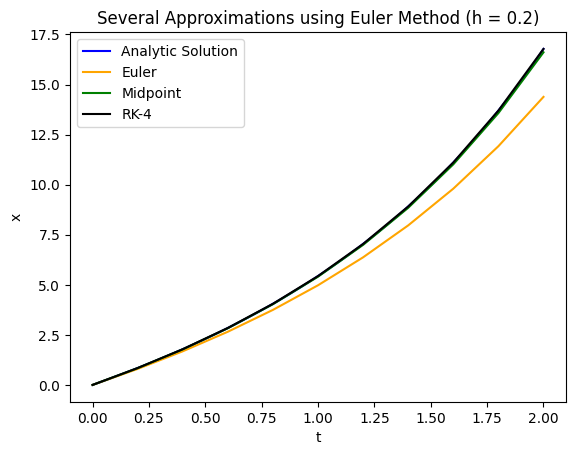

In [136]:
# Make a lambda function for the analytic solution
analytic = lambda t: -2 + 2*t + 2*np.exp(t)
T = np.linspace(0,2,500)

# Plot the approximation data
plt.plot(T, analytic(T), color = 'blue', label = 'Analytic Solution')
plt.plot(t_1, euler_answer_1, color = 'orange', label = 'Euler')
plt.plot(t_1, midpoint_answer_1, color = 'green', label = 'Midpoint' )
plt.plot(t_1, rk_answer_1, color = 'black', label = 'RK-4')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Several Approximations using Euler Method (h = 0.2)')
plt.legend()
plt.show()

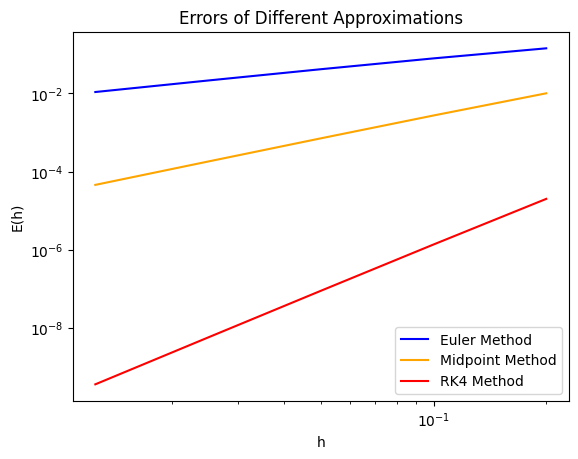

In [137]:
# Make a list of h values
H = [0.0125, 0.025, 0.05, 0.1, 0.2]

# Plot the error data
plt.loglog(H, Euler_Errors, color = 'blue', label = 'Euler Method')
plt.loglog(H, midpoint_errors, color = 'orange', label = 'Midpoint Method')
plt.loglog(H, rk_errors, color = 'red', label = 'RK4 Method')
plt.legend()
plt.xlabel('h')
plt.ylabel('E(h)')
plt.title('Errors of Different Approximations')
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

In [192]:
def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    # Calculate h
    h = (t[-1] - t[0])/(len(t) -1)
    
    # Initialze approximate solution array
    X = [x0]
  
    
    
    # Perform the Fourth-Order Runge-Kutta method
    for i in range(0, len(t) - 1):
        K1 = f(X[i], t[i])
        K2 = f(X[i] + 0.5 * h * K1, t[i] + 0.5 * h)
        K3 = f(X[i] + (h/2) * K2, t[i] + (h/2))
        K4 = f(X[i] + h * K3, t[i+1])
        
        val1 = X[i] + (h/6) * (K1 + 2*K2 + 2 * K3 + K4)


        X.append(val1)
    return X

In [204]:
# Case 1: k = 1, m = 1
k = 1
m = 1

# Write out the differential equation
function = lambda x,t: np.array([x[1], -k/m * x[0]])

# Set initial condition and time linespace
X_initial = np.array([2, -1])
T = np.linspace(0, 20, 500)

# Solve using the Runge Kutta Method
rk_1 = rk4(function, X_initial, T)
rk_1 = np.array([arr[0] for arr in rk_1])


# Case 2: k = 1, m = 3
k = 1
m = 3

# Write out the differential equation
function = lambda x,t: np.array([x[1], -k/m * x[0]])

# Set initial condition and time linespace
X_initial = np.array([2, -1])
T = np.linspace(0, 20, 500)

# Solve using the Runge Kutta Method
rk_2 = rk4(function, X_initial, T)
rk_2 = np.array([arr[0] for arr in rk_2])





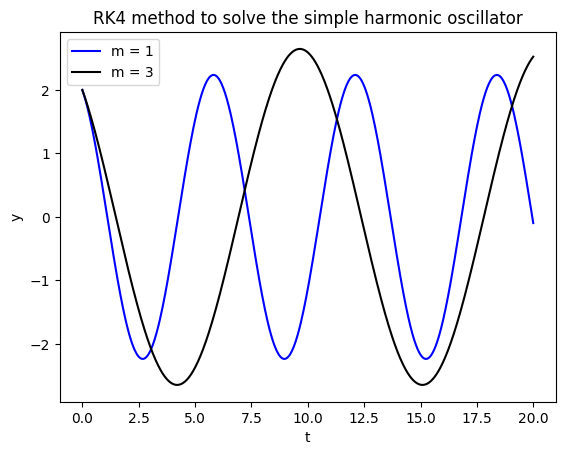

In [205]:
# Plot the data

plt.plot(T, rk_1, color = 'blue', label = 'm = 1')
plt.plot(T, rk_2, color = 'black', label = 'm = 3' )
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4 method to solve the simple harmonic oscillator')
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

In [207]:
# Case 1: 
gamma = 1/2

# Write out the differential equation
function = lambda x,t: np.array([x[1], -x[0] - gamma * x[1]])

# Set initial condition and time linespace
X_initial = np.array([1, -1])
T = np.linspace(0, 20, 500)

# Solve using the Runge Kutta Method
rk_1 = rk4(function, X_initial, T)
rk_1 = np.array([arr[0] for arr in rk_1])


# Case 2:
gamma = 1

# Write out the differential equation
function = lambda x,t: np.array([x[1], -x[0] - gamma * x[1]])

# Set initial condition and time linespace
X_initial = np.array([1, -1])
T = np.linspace(0, 20, 500)

# Solve using the Runge Kutta Method
rk_2 = rk4(function, X_initial, T)
rk_2 = np.array([arr[0] for arr in rk_2])

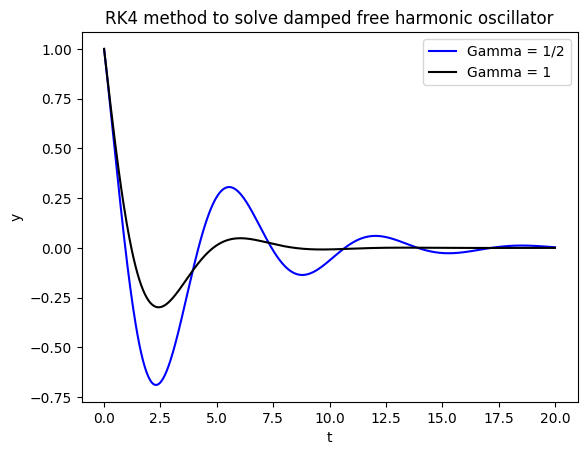

In [210]:
# Plot the data

plt.plot(T, rk_1, color = 'blue', label = 'Gamma = 1/2')
plt.plot(T, rk_2, color = 'black', label = 'Gamma = 1' )
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4 method to solve damped free harmonic oscillator')
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 

\begin{align*}
2y'' + \gamma y' + 2y &= 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
y(0) &= 2,\\
y'(0) &= -1
\end{align*}

For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

In [244]:
# Case 1: 
gamma = 1/2
omega = 3/2

# Write out the differential equation
function = lambda x,t: np.array([x[1], np.cos(omega * t) - gamma/2 * x[1] - x[0]])

# Set initial condition and time linespace
X_initial = np.array([2, -1])
T = np.linspace(0, 40, 1000)

# Solve using the Runge Kutta Method
rk_1 = rk4(function, X_initial, T)
rk_1 = np.array([arr[0] for arr in rk_1])


# Case 2: 
gamma = 0.1
omega = 1.1

# Write out the differential equation
function = lambda x,t: np.array([x[1], np.cos(omega * t) - (gamma/2) * x[1] - x[0]])

# Set initial condition and time linespace
X_initial = np.array([2, -1])
T = np.linspace(0, 40, 1000)

# Solve using the Runge Kutta Method
rk_2 = rk4(function, X_initial, T)
rk_2 = np.array([arr[0] for arr in rk_2])


# Case 3: 
gamma = 0
omega = 1

# Write out the differential equation
function = lambda x,t: np.array([x[1], np.cos(omega * t) - (gamma/2) * x[1] - x[0]])

# Set initial condition and time linespace
X_initial = np.array([2, -1])
T = np.linspace(0, 40, 1000)

# Solve using the Runge Kutta Method
rk_3 = rk4(function, X_initial, T)
rk_3 = np.array([arr[0] for arr in rk_3])


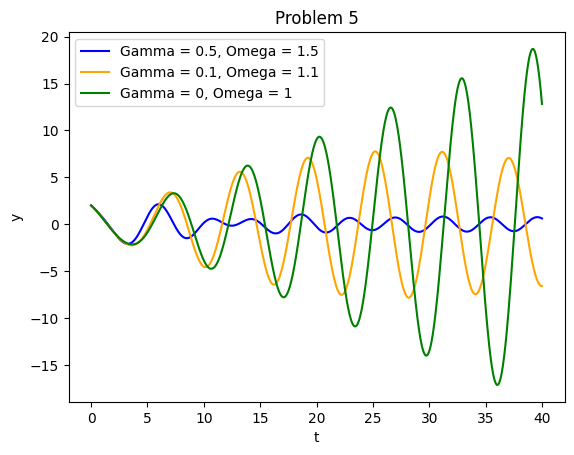

In [245]:
# Plot the data
plt.plot(T, rk_1, color = 'blue', label = 'Gamma = 0.5, Omega = 1.5')
plt.plot(T, rk_2, color = 'orange', label = 'Gamma = 0.1, Omega = 1.1')
plt.plot(T, rk_3, color = 'green', label = 'Gamma = 0, Omega = 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Problem 5')
plt.show()